In [77]:
#import pandas and open the tatanic dataset downloaded online
import pandas as pd  
data = pd.read_csv(r"C:/Users/Administrator/Desktop/data.csv",index_col=0)

In [78]:
#A look at the Data
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [79]:
# A look at the Data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


# Question1

1.After analysing the data, are there any columns or rows that you feel comfortable dropping in this dataframe and why?

Answer:The columns,"Cabin","Name","Ticket", could be dropped since there seems to be no correlation with the label 'Survived'. 
And,the number of the values of 'Cabin' is only 204 wihch is less than 1/4 times of other columns.

In [80]:
#Drop the following three columns
data.drop(["Cabin","Name","Ticket"],inplace=True,axis=1)

In [81]:
#Chech whether the above three columns have been deleted from the dataframe
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


In [82]:
#Look at the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.6+ KB


# Question2

2.How to deal with the missing values
Answer: Drop the nan values and then decide how to impute the missing values

In [83]:
# The column 'Age' presents the most missing values, in which case imputing the mean of the column of 'Age' based on the understanding of the real situation should be done.
data["Age"] = data["Age"].fillna(data["Age"].mean())

In [86]:
# Considering the unbalanced values,it should drop any rows with missing values
data = data.dropna()

In [87]:
#Look at the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB


In [88]:
#Look at the data
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


# Question3

3.In general, do sex appear to have higer survived possibility?
Answer : Yes

In [89]:
data.groupby(['Sex']).mean()['Survived'].sort_values()

Sex
male      0.188908
female    0.740385
Name: Survived, dtype: float64

# Question4

4. How many of the columns are consirded categorical? How to handle them

In [90]:
data.select_dtypes(include=['object']).shape[1]

2

In [91]:
# Convert binary variables to numeric variables
data['Sex'] = (data['Sex']== 'male').astype('int')

In [92]:
#Look at the data
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,S
2,1,1,0,38.0,1,0,71.2833,C
3,1,3,0,26.0,0,0,7.9250,S
4,1,1,0,35.0,1,0,53.1000,S
5,0,3,1,35.0,0,0,8.0500,S


In [93]:
#Convert three categorical variables to numeric variables
embarked = data["Embarked"].unique().tolist()
data["Embarked"] = data["Embarked"].apply(lambda x: embarked.index(x))

In [94]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,0
2,1,1,0,38.0,1,0,71.2833,1
3,1,3,0,26.0,0,0,7.9250,0
4,1,1,0,35.0,1,0,53.1000,0
5,0,3,1,35.0,0,0,8.0500,0


In [95]:
# Now, there are no missing values and all numerical variables. The data preprocessing has been finished.
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 1 to 891
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int32  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int64  
dtypes: float64(2), int32(1), int64(5)
memory usage: 59.0 KB


# Question 5

5. How to build the model for predicting the survived possiblity? 

In [96]:
#Split into explanatory and response variables
X = data.iloc[:,data.columns != "Survived"]
y = data.iloc[:,data.columns == "Survived"]

In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [98]:
#Split into train and test
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,y,test_size=0.3)

In [99]:
Xtrain.head() # the index of the train set is mixed

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
328,2,0,36.000000,0,0,13.0000,0
565,3,0,29.699118,0,0,8.0500,0
18,2,1,29.699118,0,0,13.0000,0
219,1,0,32.000000,0,0,76.2917,1
748,2,0,30.000000,0,0,13.0000,0


In [100]:
# Correct the index of the test set and training set
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [101]:
Xtrain.head() # the index comes to normal

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,2,0,36.000000,0,0,13.0000,0
1,3,0,29.699118,0,0,8.0500,0
2,2,1,29.699118,0,0,13.0000,0
3,1,0,32.000000,0,0,76.2917,1
4,2,0,30.000000,0,0,13.0000,0


In [102]:
clf = DecisionTreeClassifier(random_state=42) # Instantiate
clf = clf.fit(Xtrain, Ytrain) #Fit
score_ = clf.score(Xtest, Ytest)# Score the model

In [103]:
score_

0.7715355805243446

In [104]:
score = cross_val_score(clf,X,y,cv=10).mean() # Based on cross-validation method
score

0.7818181818181819

# Question6

6. The accuracy of the test dataset is low. How to modify the parameteres to get a higher accuracy?

0.8177860061287026


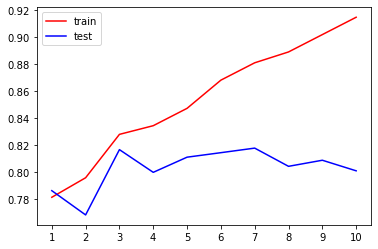

In [105]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                                 ,max_depth=i+1
                                 ,criterion="entropy"
                                )
    clf = clf.fit(Xtrain, Ytrain)
    score_tr = clf.score(Xtrain,Ytrain)
    score_te = cross_val_score(clf,X,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()

In [106]:
import numpy as np
gini_thresholds = np.linspace(0,0.5,20)

parameters = {'splitter':('best','random')
              ,'criterion':("gini","entropy")
              ,"max_depth":[*range(1,10)]
              ,'min_samples_leaf':[*range(1,50,5)]
              ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
             }

clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf, parameters, cv=10)
GS.fit(Xtrain,Ytrain)

GS.best_params_

GS.best_score_

0.8264464925755248